# data overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bank_full_df = pd.read_csv(r"C:\Users\chau\Desktop\ML-miniproject\data\bank-full.csv", encoding = "Latin-1")
bank_full_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [2]:
bank_full_df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [5]:
bank_full_df.loc[bank_full_df.pdays == -1].value_counts

<bound method DataFrame.value_counts of        age           job  marital  education default  balance housing loan  \
29778   41   blue-collar  married    primary      no      201     yes   no   
30788   46  entrepreneur  married  secondary      no      122      no   no   
34437   45   blue-collar  married  secondary      no      640     yes   no   
44401   62       retired  married  secondary      no      569      no   no   
44402   29    management  married   tertiary      no      198     yes   no   
44403   68       retired  married   tertiary      no     2812      no   no   
44404   38    management  married   tertiary      no     1199      no   no   
44410   78       retired  married    unknown      no       38      no   no   
44413   33    technician  married  secondary      no     1026      no   no   
44417   35    management   single   tertiary      no      747      no   no   
44421   60     housemaid  married  secondary      no        0      no   no   
44423   42        admin.

<AxesSubplot:title={'center':'deposit'}, ylabel='result'>

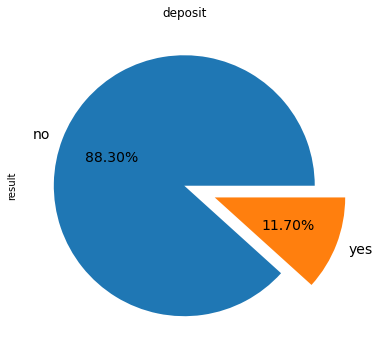

In [9]:
data = bank_full_df.y.value_counts()
data.plot.pie(figsize=(10,6), ylabel = 'result', fontsize = 14, autopct='%1.2f%%', title = 'deposit', explode=[0,0.25])

>the class label is highly imbalance, over will balance it by undersampling

In [10]:
from sklearn.utils import shuffle

In [11]:
# from domain specific knowledge, we balance data by taking 11162 examples and keep all the 'yes' class label
bank_yes = bank_full_df.loc[bank_full_df.y == 'yes']
bank_no = bank_full_df.loc[bank_full_df.y == 'no'].sample(n = 11162 - 5289, random_state = 42)
new_df = shuffle(pd.concat([bank_yes, bank_no]), random_state = 42).reset_index(drop = 1)
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,blue-collar,married,secondary,no,5164,no,no,cellular,21,nov,253,1,-1,0,unknown,no
1,56,management,married,primary,no,870,no,no,cellular,14,may,220,1,179,1,success,yes
2,28,student,single,tertiary,no,844,no,no,cellular,16,apr,551,2,-1,0,unknown,yes
3,27,blue-collar,single,secondary,no,535,no,no,cellular,16,aug,265,3,95,4,success,yes
4,59,retired,married,primary,no,4007,no,no,cellular,26,mar,157,2,116,4,failure,no


In [12]:
new_df.y.value_counts()

no     5873
yes    5289
Name: y, dtype: int64

<AxesSubplot:title={'center':'deposit'}, ylabel='result'>

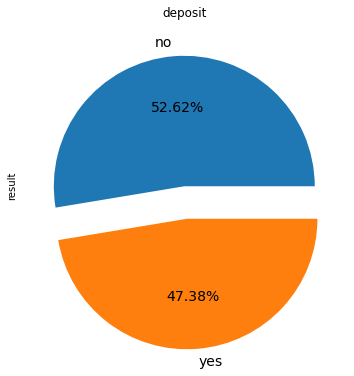

In [13]:
data = new_df.y.value_counts()
data.plot.pie(figsize=(10,6), ylabel = 'result', fontsize = 14, autopct='%1.2f%%', title = 'deposit', explode=[0,0.25])

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  y          11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# attributes: categorical and numerical overview

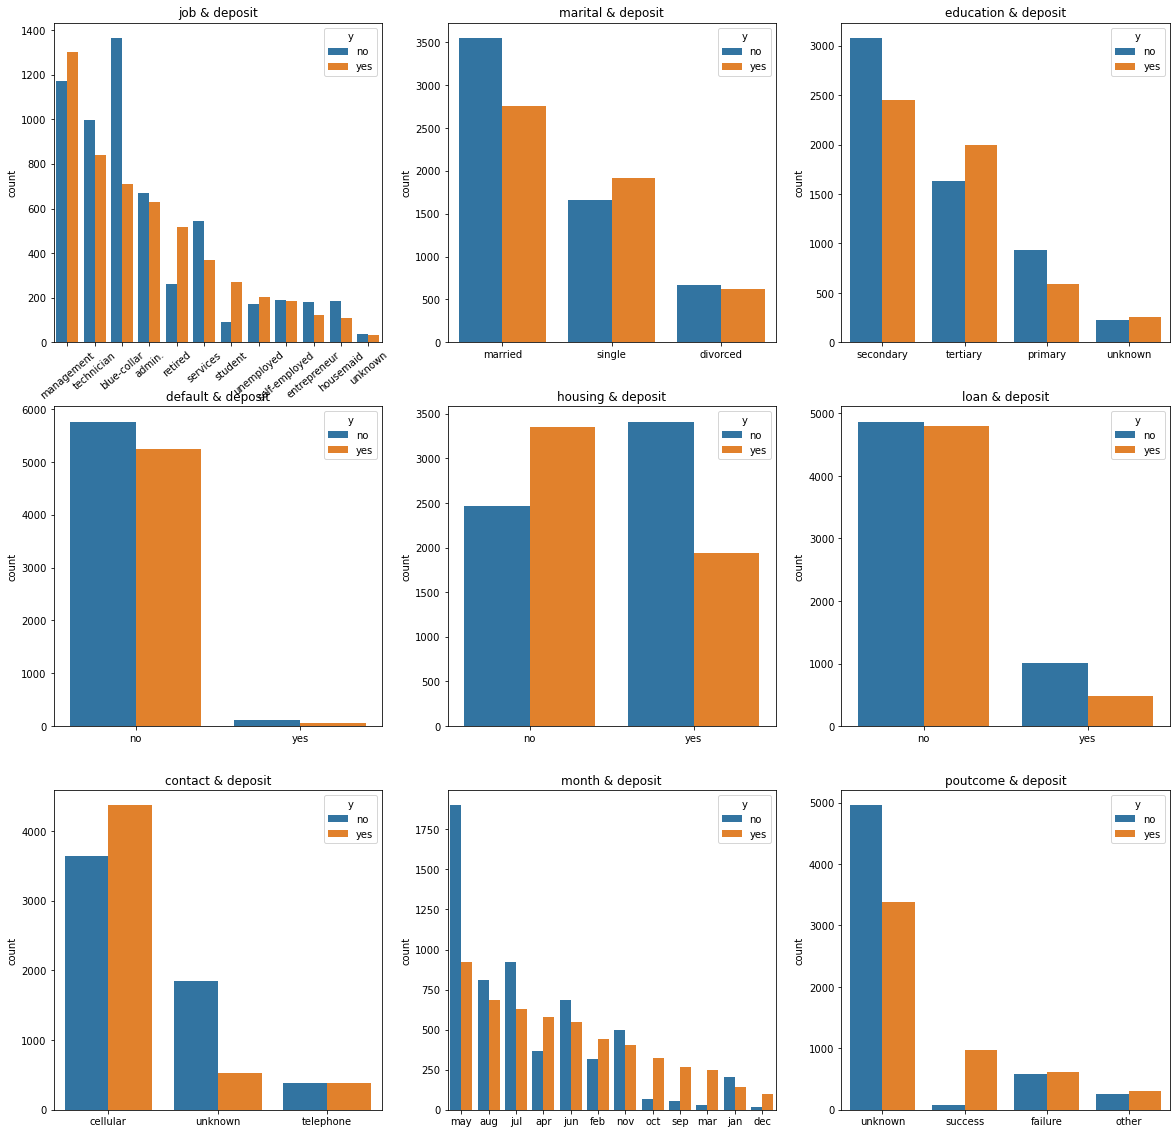

In [15]:
# categorical attributes
categories = ['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
fig, ax = plt.subplots(figsize = (20,20), ncols=3, nrows = 3)
count =0
for col in categories:
    g=sns.countplot(x = col, data = new_df, hue = 'y', order = bank_yes[col].value_counts().index, ax = ax[count//3, count%3])
    g.set_title(col+' & deposit')
    g.set_xlabel(None,fontsize = 9)
    if col == 'job':
        plt.setp(g.get_xticklabels(), rotation=40)
    count+=1

> here we see job, education, contact and poutcome have unkown/missing values
> with job, education, contact we impute missing values by apply most-frequent strategy
> with poutcome since unkown values appears more than 80%, we consider dropping it
> other categorical attribute will be convert into numerical by number 1, 2, 3, ...

count    11162.000000
mean        41.219674
std         11.881276
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64 

count    11162.000000
mean      1513.864361
std       3092.950161
min      -3058.000000
25%        117.000000
50%        546.500000
75%       1707.750000
max      81204.000000
Name: balance, dtype: float64 

count    11162.000000
mean        15.461476
std          8.425059
min          1.000000
25%          8.000000
50%         15.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64 

count    11162.000000
mean       369.722810
std        347.626174
min          0.000000
25%        138.000000
50%        252.000000
75%        489.000000
max       3881.000000
Name: duration, dtype: float64 

count    11162.000000
mean         0.851371
std          3.442755
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        275.000000

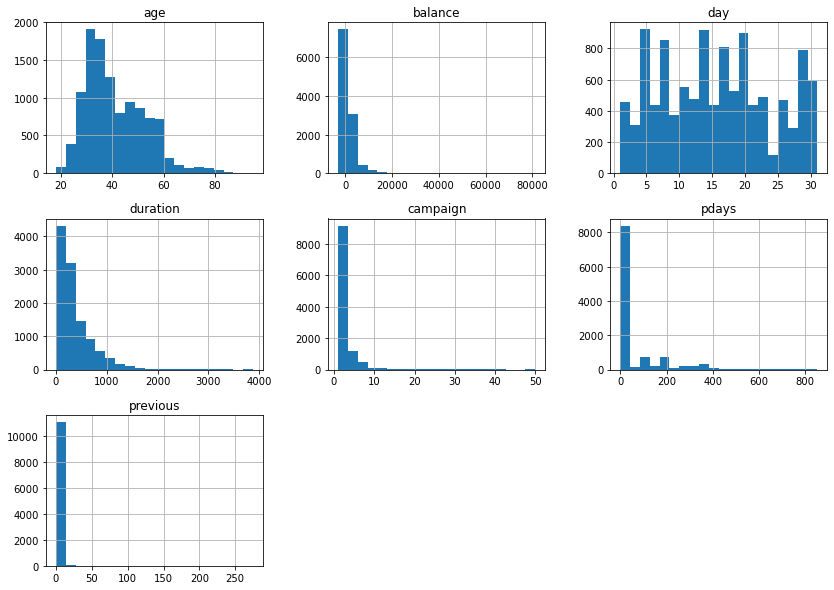

In [44]:
# numerical attributes
for col in numerical:
    print(new_df[col].describe(),"\n")
new_df.drop(columns='y').hist(bins = 20, figsize=(14,10))
plt.show()

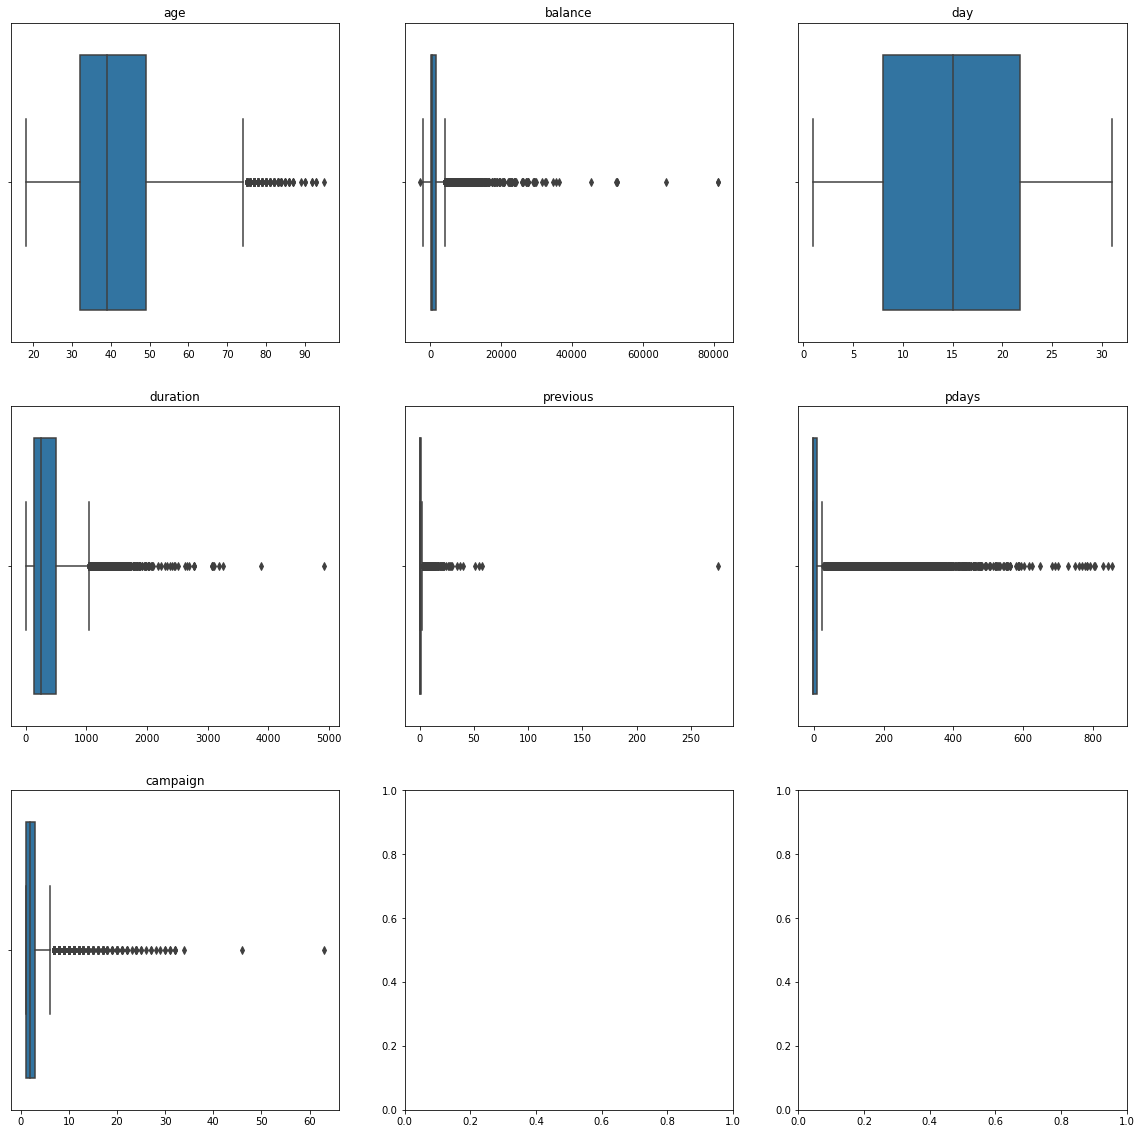

In [23]:
fig, ax = plt.subplots(figsize = (20,20), ncols=3, nrows = 3)
count =0
for col in ['age', 'balance', 'day', 'duration', 'previous', 'pdays', 'campaign']:
    if count < 7:
        g=sns.boxplot(x = col, data = new_df, ax = ax[count//3, count%3])
        g.set_title(col)
        g.set_xlabel(None,fontsize = 9)
        count+=1

In [18]:
numerical = ['age', 'balance', 'day', 'duration', 'previous', 'pdays', 'campaign']
outlier = {}
for col in numerical:
    outlier[col] = []
    data = new_df[col].to_numpy()
    mean = new_df[col].mean()
    std = new_df[col].std()
    count_ouliers = 0
    for i in range(len(data)):
        z = (data[i]-mean)/std
        if z >3 or z<-3:
            count_ouliers+=1
            outlier[col].append(i)
    print(col+': ', count_ouliers)
outlier_age = outlier['age']
outlier_balance = outlier['balance']
outlier_duration = outlier['duration']
outlier_previous = outlier['previous']
outlier_campaign = outlier['campaign']
a=list(set(outlier_balance+outlier_campaign+outlier_previous+outlier_age+outlier_duration))
len(a)

age:  126
balance:  183
day:  0
duration:  197
previous:  68
pdays:  178
campaign:  214


459

<AxesSubplot:>

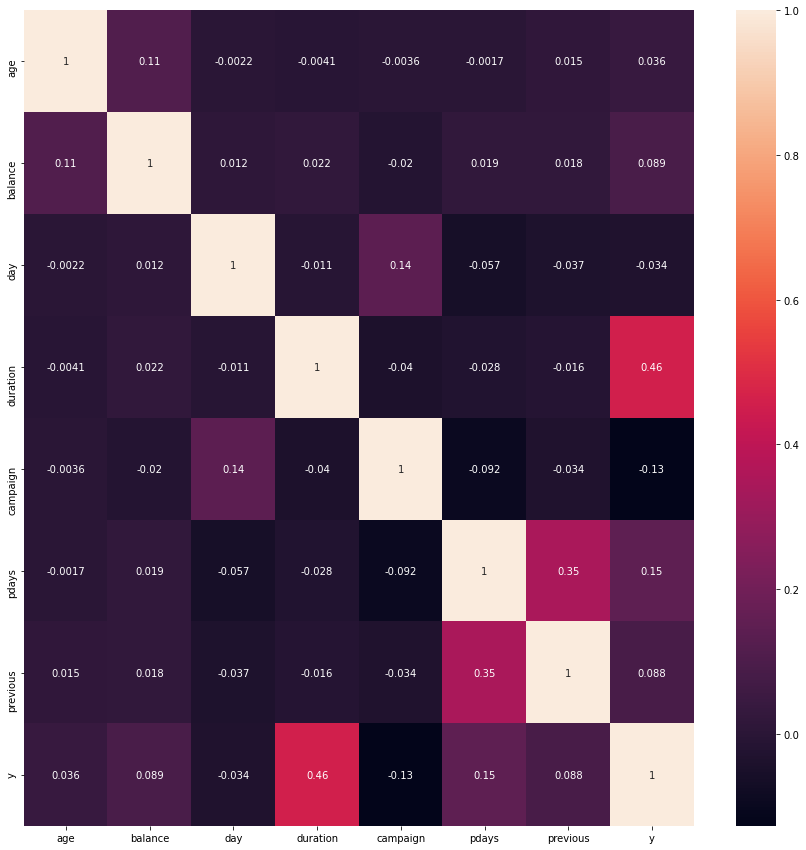

In [45]:
def tran_y(x):
    if x == 'yes':
        return 1
    if x == 'no':
        return 0
    else:
        return x
new_df.y = new_df.y.apply(tran_y)
plt.subplots(figsize = (15,15))
sns.heatmap(data = new_df.corr(), annot=True)

>pdays and poutcome do not correlate to the outcome much so we can drop those attributes

# imputing missing values

In [37]:
from sklearn.impute import SimpleImputer
imputer_mode = SimpleImputer(missing_values= 'unknown', strategy= 'most_frequent')

# categorical data transformation

In [40]:
def tran_job(x):
  if x == 'housemaid':
    return 1
  if x == 'entrepreneur':
    return 2
  if x == 'self-employed':
    return 3
  if x == 'unemployed':
    return 4
  if x == 'student':
    return 5
  if x == 'services':
    return 6
  if x == 'retired':
    return 7
  if x == 'admin.':
    return 8
  if x == 'blue-collar':
    return 9
  if x == 'technician':
    return 10
  if x == 'management':
    return 11
  else:
    return x
def tran_marital(x):
  if x == 'married':
    return 3
  if x == 'single':
    return 2
  if x == 'divorced':
    return 1
  else:
    return x
def tran_education(x):
  if x == 'secondary':
    return 3
  if x == 'tertiary':
    return 2
  if x == 'primary':
    return 1
  else:
    return x
def tran_binary_no(x):
  if x == 'no':
    return 1
  if x =='yes':
    return 0
  else:
    return x
def tran_contact(x):
    if x == 'cellular':
        return 1
    if x == 'telephone':
        return 0
    else:
        return x
def tran_month(x):
    if x == 'dec':
        return 1
    if x == 'jan':
        return 2
    if x == 'mar':
        return 3
    if x == 'sep':
        return 4
    if x == 'oct':
        return 5
    if x == 'nov':
        return 6
    if x == 'feb':
        return 7
    if x == 'jun':
        return 8
    if x == 'apr':
        return 9
    if x == 'jul':
        return 10
    if x == 'aug':
        return 11
    if x == 'may':
        return 12
def tran_y(x):
    if x == 'yes':
        return 1
    if x == 'no':
        return 0
    else:
        return x

# group age, duration and remove outliers from balance, campaign, previous

In [41]:
def duration_group( x):
    if x <=102:
        return 1
    elif x<=180:
        return 2
    elif x <=319:
        return 3
    elif x<=644.5:
        return 4
    else:
        return 5
def age_group(x):
    if x <=32:
        return 1
    elif x <= 47:
        return 2
    elif x <= 70:
        return 3
    else:
        return 4
def remove_outliers(data):
    new = data.copy()
    numerical = ['balance', 'previous', 'campaign', 'age', 'duration']
    outlier = {}
    for col in numerical:
        outlier[col] = []
        data = new_df[col].to_numpy()
        mean = new_df[col].mean()
        std = new_df[col].std()
        count_ouliers = 0
        for i in range(len(data)):
            z = (data[i]-mean)/std
            if z >3 or z<-3:
                count_ouliers+=1
                outlier[col].append(i)
    o = list(set(outlier['balance']+outlier['previous']+outlier['campaign']+outlier['age'] + outlier['duration']))
    new.drop(new.index[o], inplace = True)
    return new
    

# transform the dataset and normalize data

In [42]:
from sklearn.preprocessing import StandardScaler
def preprocessing(dataframe):
    copy_df = dataframe.copy()
    columns = copy_df.columns
    imputer_mode = SimpleImputer(missing_values= 'unknown', strategy= 'most_frequent')
    copy_df = imputer_mode.fit_transform(copy_df)
    copy_df = pd.DataFrame(copy_df, columns = columns)
    copy_df.job = copy_df.job.apply(tran_job)
    copy_df.marital = copy_df.marital.apply(tran_marital)
    copy_df.education = copy_df.education.apply(tran_education)
    copy_df.default = copy_df.default.apply(tran_binary_no)
    copy_df.housing = copy_df.housing.apply(tran_binary_no)
    copy_df.loan = copy_df.loan.apply(tran_binary_no)
    copy_df.contact = copy_df.contact.apply(tran_contact)
    copy_df.month = copy_df.month.apply(tran_month)
    copy_df = copy_df.drop(columns = ['poutcome', 'pdays'])
    copy_df.age = copy_df.age.apply(age_group)
    copy_df.duration = copy_df.duration.apply(duration_group)
    copy_df.y = copy_df.y.apply(tran_y)
    copy_df = remove_outliers(copy_df).reset_index(drop = 1)
    
    feature = []
    for i in columns:
        if i not in ['y', 'poutcome', 'pdays']:
            feature.append(i)
    scaler = StandardScaler()
    X = scaler.fit_transform(copy_df.drop(columns = 'y'))
    y = copy_df.y
    X = pd.DataFrame(X, columns = feature);
    copy_df = pd.concat([X, y], axis= 1)
    
    return copy_df

In [43]:
input_df = preprocessing(new_df)
input_df.to_csv(r'C:\Users\chau\Desktop\ML-miniproject\data\encoded_data.csv', index = False, header=True)
input_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,-1.301389,0.297024,0.795821,0.829740,0.121618,2.128586,0.958176,0.391587,0.268956,0.664024,-1.009095,-0.061882,-0.739070,-0.435481,0
1,1.238503,1.043018,0.795821,-1.959428,0.121618,-0.202594,0.958176,0.391587,0.268956,-0.171131,1.050860,-0.061882,-0.739070,0.162307,1
2,-1.301389,-1.194962,-0.648342,-0.564844,0.121618,-0.216709,0.958176,0.391587,0.268956,0.067485,0.020882,0.702925,-0.144045,-0.435481,1
3,-1.301389,0.297024,-0.648342,0.829740,0.121618,-0.384463,0.958176,0.391587,0.268956,0.067485,0.707534,-0.061882,0.450981,1.955671,1
4,1.238503,-0.448969,0.795821,-1.959428,0.121618,1.500459,0.958176,0.391587,0.268956,1.260563,-2.039073,-0.826689,-0.144045,1.955671,0


In [44]:
preprocessing(bank_full_df).to_csv(r'C:/Users/chau/Desktop/ML-miniproject/data/bank-full-encoded.csv', index = False, header=True)